In [ ]:
'''
Course Name: Pattern Recognition Lab
Course Number: CSE 4214
Experiment no. 4: Implementing K Means Clustering

Name: Humaira Zahin Mauni
Section: A1
ID: 160104012
'''

In [68]:
import numpy as np
import pandas as pd
import random as rd
import io
import matplotlib.pyplot as plt
from google.colab import files

In [69]:
## Q1
uploaded = files.upload() 

Saving blobs.txt to blobs (1).txt


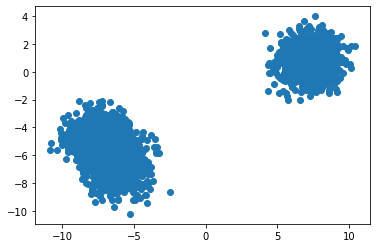

In [121]:
## Q1
df = pd.read_csv(io.BytesIO(uploaded['blobs.txt'] ), sep=" " ,  header = None, dtype = 'float64')
df.columns = ['x1','x2']
X = df.values
plt.scatter(X[:,0],X[:,1])
plt.show()

In [132]:
##Q2

X = df.values
m = X.shape[0] 
n = X.shape[1]
print("No. of data points: ",m,"\nNo. of data features:",n)
K = int(input("Enter the value of K: "))

No. of data points:  3000 
No. of data features: 2
Enter the value of K: 5


In [133]:
def k_means(K, c):  
    ED = np.zeros((m, 0))
    out = {} #temporary output for this iteration
    for k in range(K):
        tempDist = np.sqrt(np.sum((X - c[:,k])**2, axis=1))
        ED = np.c_[ED, tempDist]
        out[k] = np.zeros((n, 0))
    c_temp = np.argmin(ED, axis=1)
        
    for i in range(m):
        out[c_temp[i]] = np.c_[out[c_temp[i]], X[i]]
    
    for k in range(K):
        out[k] = out[k].T
  
    for k in range(K):
        c[:,k] = np.mean(out[k], axis=0)
    return out, c

In [134]:
#randomly assign centroid 
c = np.zeros((n, 0))
for i in range(K):
    rand = rd.randint(0,m-1)
    c = np.c_[c, X[rand]]
print("Centroids before clustering: \n", c)

Output = {} #dictionary of each cluster, with cluster number as dictionary key, and data points that belong to the cluster as its corresponding values
iterations = 200
for i in range(iterations):
  Output, c = k_means(K, c)
print("\nCentroids after clustering: \n", c)
#print(dict(list(Output.items())[0:2]))

Centroids before clustering: 
 [[-6.97362  9.14498 -8.29792 -6.56073 -7.1662 ]
 [-6.32637  0.62915 -4.55364 -5.79975 -5.07137]]

Centroids after clustering: 
 [[-7.06443374  7.21831715 -8.35907246 -5.32456176 -6.70278898]
 [-6.86917315  0.78213112 -4.66870528 -6.66239119 -4.66793554]]


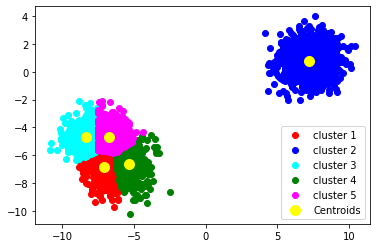

In [135]:
## Q3
color = ['red', 'blue', 'cyan', 'green', 'magenta']
labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
for k in range(K):
    plt.scatter(Output[k][:,0], Output[k][:,1], c=color[k], label=labels[k])
plt.scatter(c[0,:], c[1,:], s=100, c='yellow', label='Centroids')
plt.legend()
plt.show()